# Diabetes Health Indicator

---

**Authors:**  
- Anshu Anand  
- Nayan Mahto  
- Om Kumar  
- Saket Kumar

---


This notebook presents an analysis of key health indicators related to diabetes. Explore the data, visualizations, and insights to better understand diabetes risk factors and trends.


Importing Modules

In [1]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns     # For advanced visualizations


📊 Loading Data and Getting Descriptions

In [37]:
Data = pd.read_csv("https://raw.githubusercontent.com/Om-Kumar-Ace/Diabetes-Health-Indicator/refs/heads/main/Data/diabetes_data.csv")  # Load training dataset
X = Data.copy()                  # Create a copy for manipulation
X.describe(include="all")        # Get descriptive statistics of all columns


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70690.000000,70691.000000,70690.000000,70691.000000,70457.000000,70691.000000,70622.000000,70691.000000,70687.000000,70691.000000,70691.000000,70687.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856981,0.475266,0.147814,0.703032,0.611863,0.788785,0.042735,2.837066,3.751878,5.810499,0.252734,0.062176,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.114052,0.499391,0.354918,0.456926,0.487330,0.408173,0.202259,1.113564,8.155269,10.062308,0.434583,0.241476,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
print(X.dtypes)

Age                       int64
Sex                       int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                    int64
Diabetes                  int64
dtype: object


Searching for null values

In [39]:
print("Null value count: ",X.isnull().sum())

Null value count:  Age                       0
Sex                       0
HighChol                  0
CholCheck                 0
BMI                       2
Smoker                    1
HeartDiseaseorAttack      2
PhysActivity              1
Fruits                  235
Veggies                   1
HvyAlcoholConsump        70
GenHlth                   1
MentHlth                  5
PhysHlth                  1
DiffWalk                  1
Stroke                    5
HighBP                    0
Diabetes                  0
dtype: int64


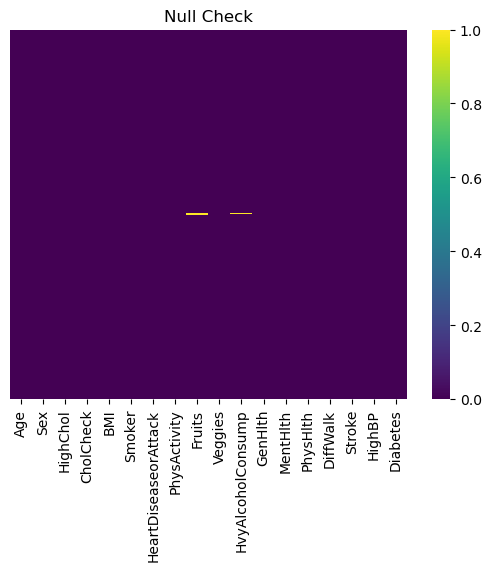

In [41]:
sns.heatmap(X.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title("Null Check")
plt.show()


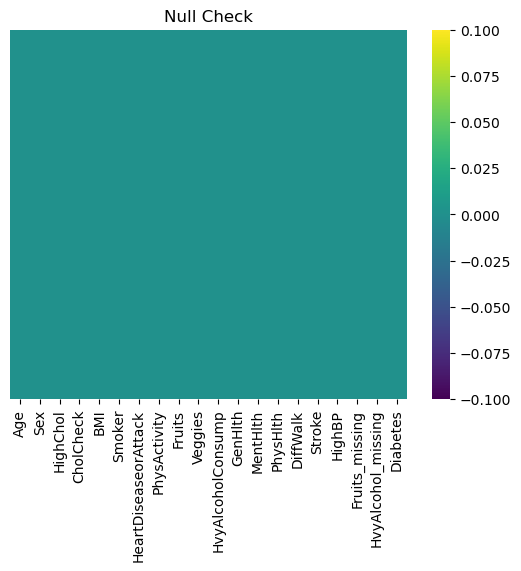

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Fruits_missing,HvyAlcohol_missing,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.0,70692.0,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475259,0.147810,0.703036,0.613153,0.788788,0.042692,2.837068,3.751613,5.810417,0.252730,0.062171,0.563458,0.0,0.0,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499391,0.354914,0.456924,0.487032,0.408171,0.202164,1.113556,8.155086,10.062261,0.434581,0.241468,0.495960,0.0,0.0,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,0.0,0.0,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [46]:
binary_cols = ['Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
               'GenHlth', 'PhysHlth', 'DiffWalk', 'Stroke']

for col in binary_cols:
    if X[col].isnull().sum() > 0:
        X[col].fillna(X[col].mode()[0], inplace=True)

for col in ['BMI', 'MentHlth']:
    mean = X[col].mean()
    std = X[col].std()
    count = X[col].isnull().sum()
    rand_vals = np.random.randint(mean - std, mean + std, size=count)
    X.loc[X[col].isnull(), col] = rand_vals

# Flag missingness
X['Fruits_missing'] = X['Fruits'].isnull().astype(int)
X['HvyAlcohol_missing'] = X['HvyAlcoholConsump'].isnull().astype(int)

# Fill with mode
X['Fruits'] = X['Fruits'].fillna(X['Fruits'].mode()[0])
X['HvyAlcoholConsump'] = X['HvyAlcoholConsump'].fillna(X['HvyAlcoholConsump'].mode()[0])

sns.heatmap(X.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title("Null Check")
plt.show()
# Move 'Diabetes' to the last column
Diabetes = X.pop('Diabetes')
X['Diabetes'] = Diabetes

X.describe(include="all")


Correlation Analysis of Features with Diabetes

In [47]:
features = X.columns[:-3]  # Assuming 'Diabetes' is the last column

# Print correlation of each feature with the target
print("\nCorrelation of each attribute with Diabetes:\n")
for col in features:
    corr = X[col].corr(X['Diabetes'])
    print(f"{col}: {corr:.4f}")


Correlation of each attribute with Diabetes:

Age: 0.2787
Sex: 0.0444
HighChol: 0.2892
CholCheck: 0.1154
BMI: 0.2934
Smoker: 0.0860
HeartDiseaseorAttack: 0.2115
PhysActivity: -0.1587
Fruits: -0.0554
Veggies: -0.0793
HvyAlcoholConsump: -0.0947
GenHlth: 0.4076
MentHlth: 0.0870
PhysHlth: 0.2131
DiffWalk: 0.2726
Stroke: 0.1254
HighBP: 0.3815


📊 Distribution & Boxplot Visualization for Key Features

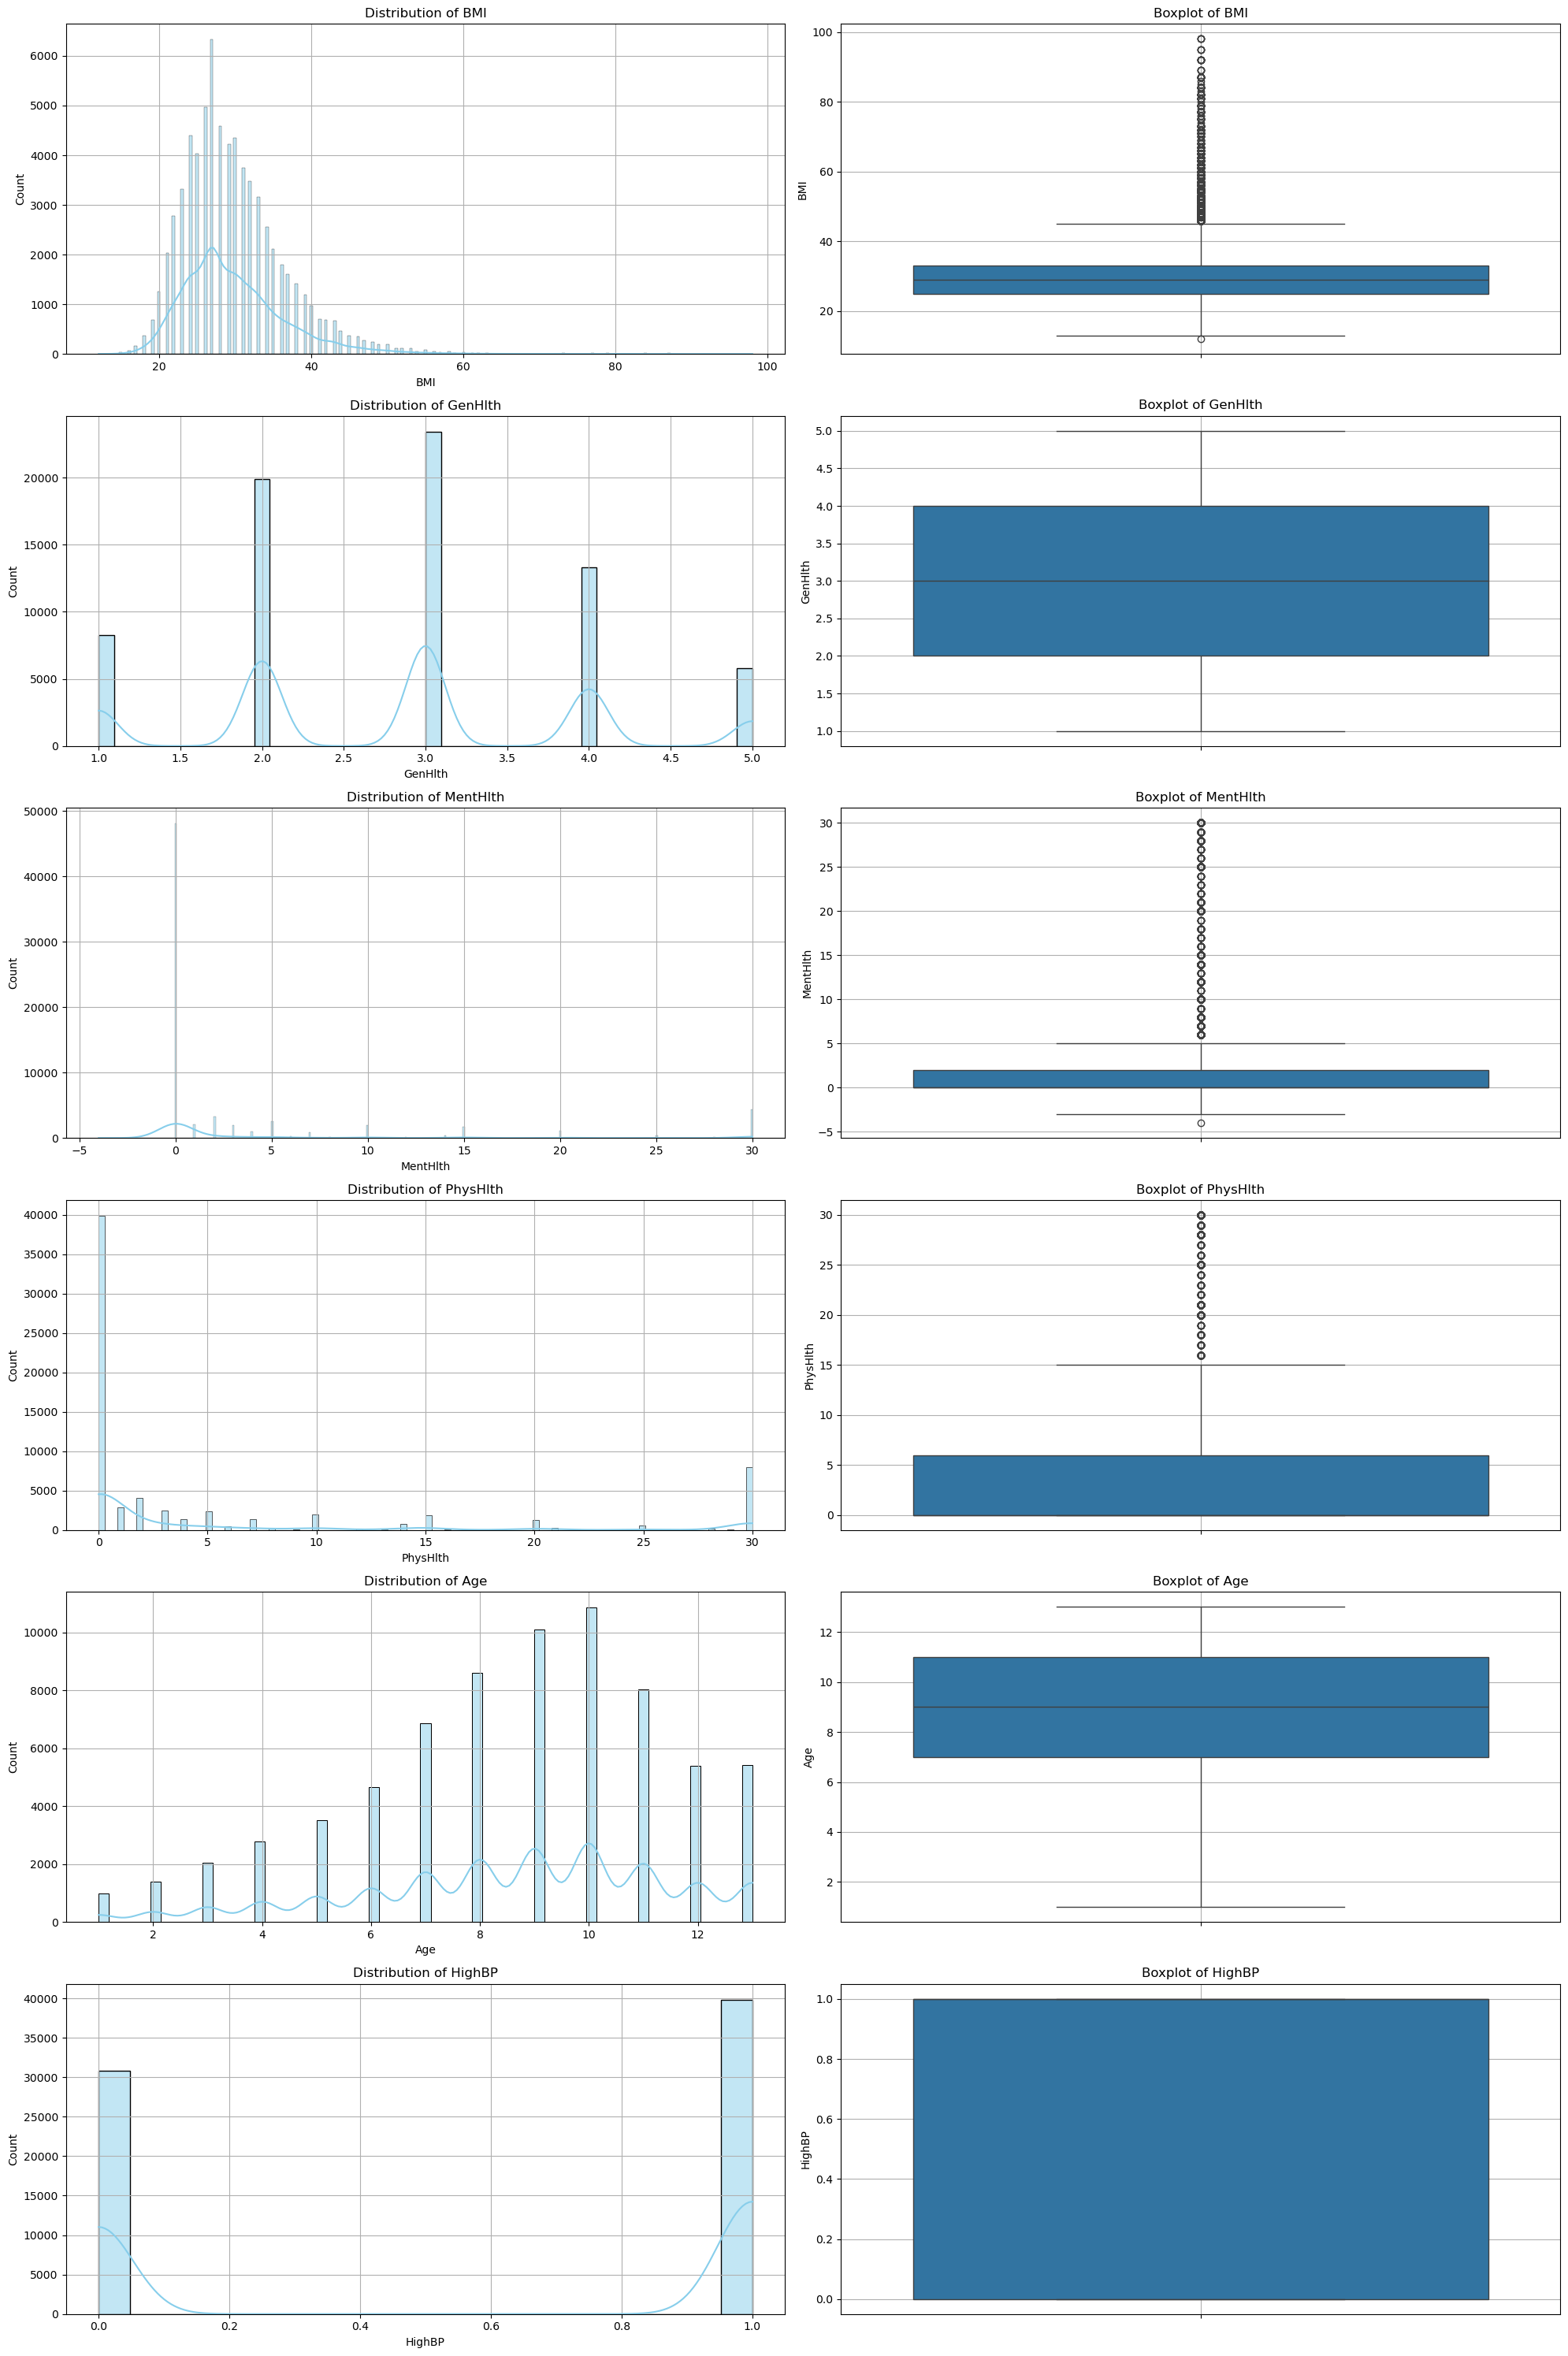

In [51]:
# Select features to visualize
features = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "HighBP"]

# Create subplots: 3 rows, 2 columns
f, axes = plt.subplots(len(features), 2, figsize=(20, 5 * len(features)))

for i, feature in enumerate(features):
    
    sns.histplot(X[feature], kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f"Distribution of {feature}")
    axes[i][0].grid()

    sns.boxplot(y=X[feature], ax=axes[i][1])  # Removed palette
    axes[i][1].set_title(f"Boxplot of {feature}")
    axes[i][1].grid()

plt.tight_layout()
plt.show()

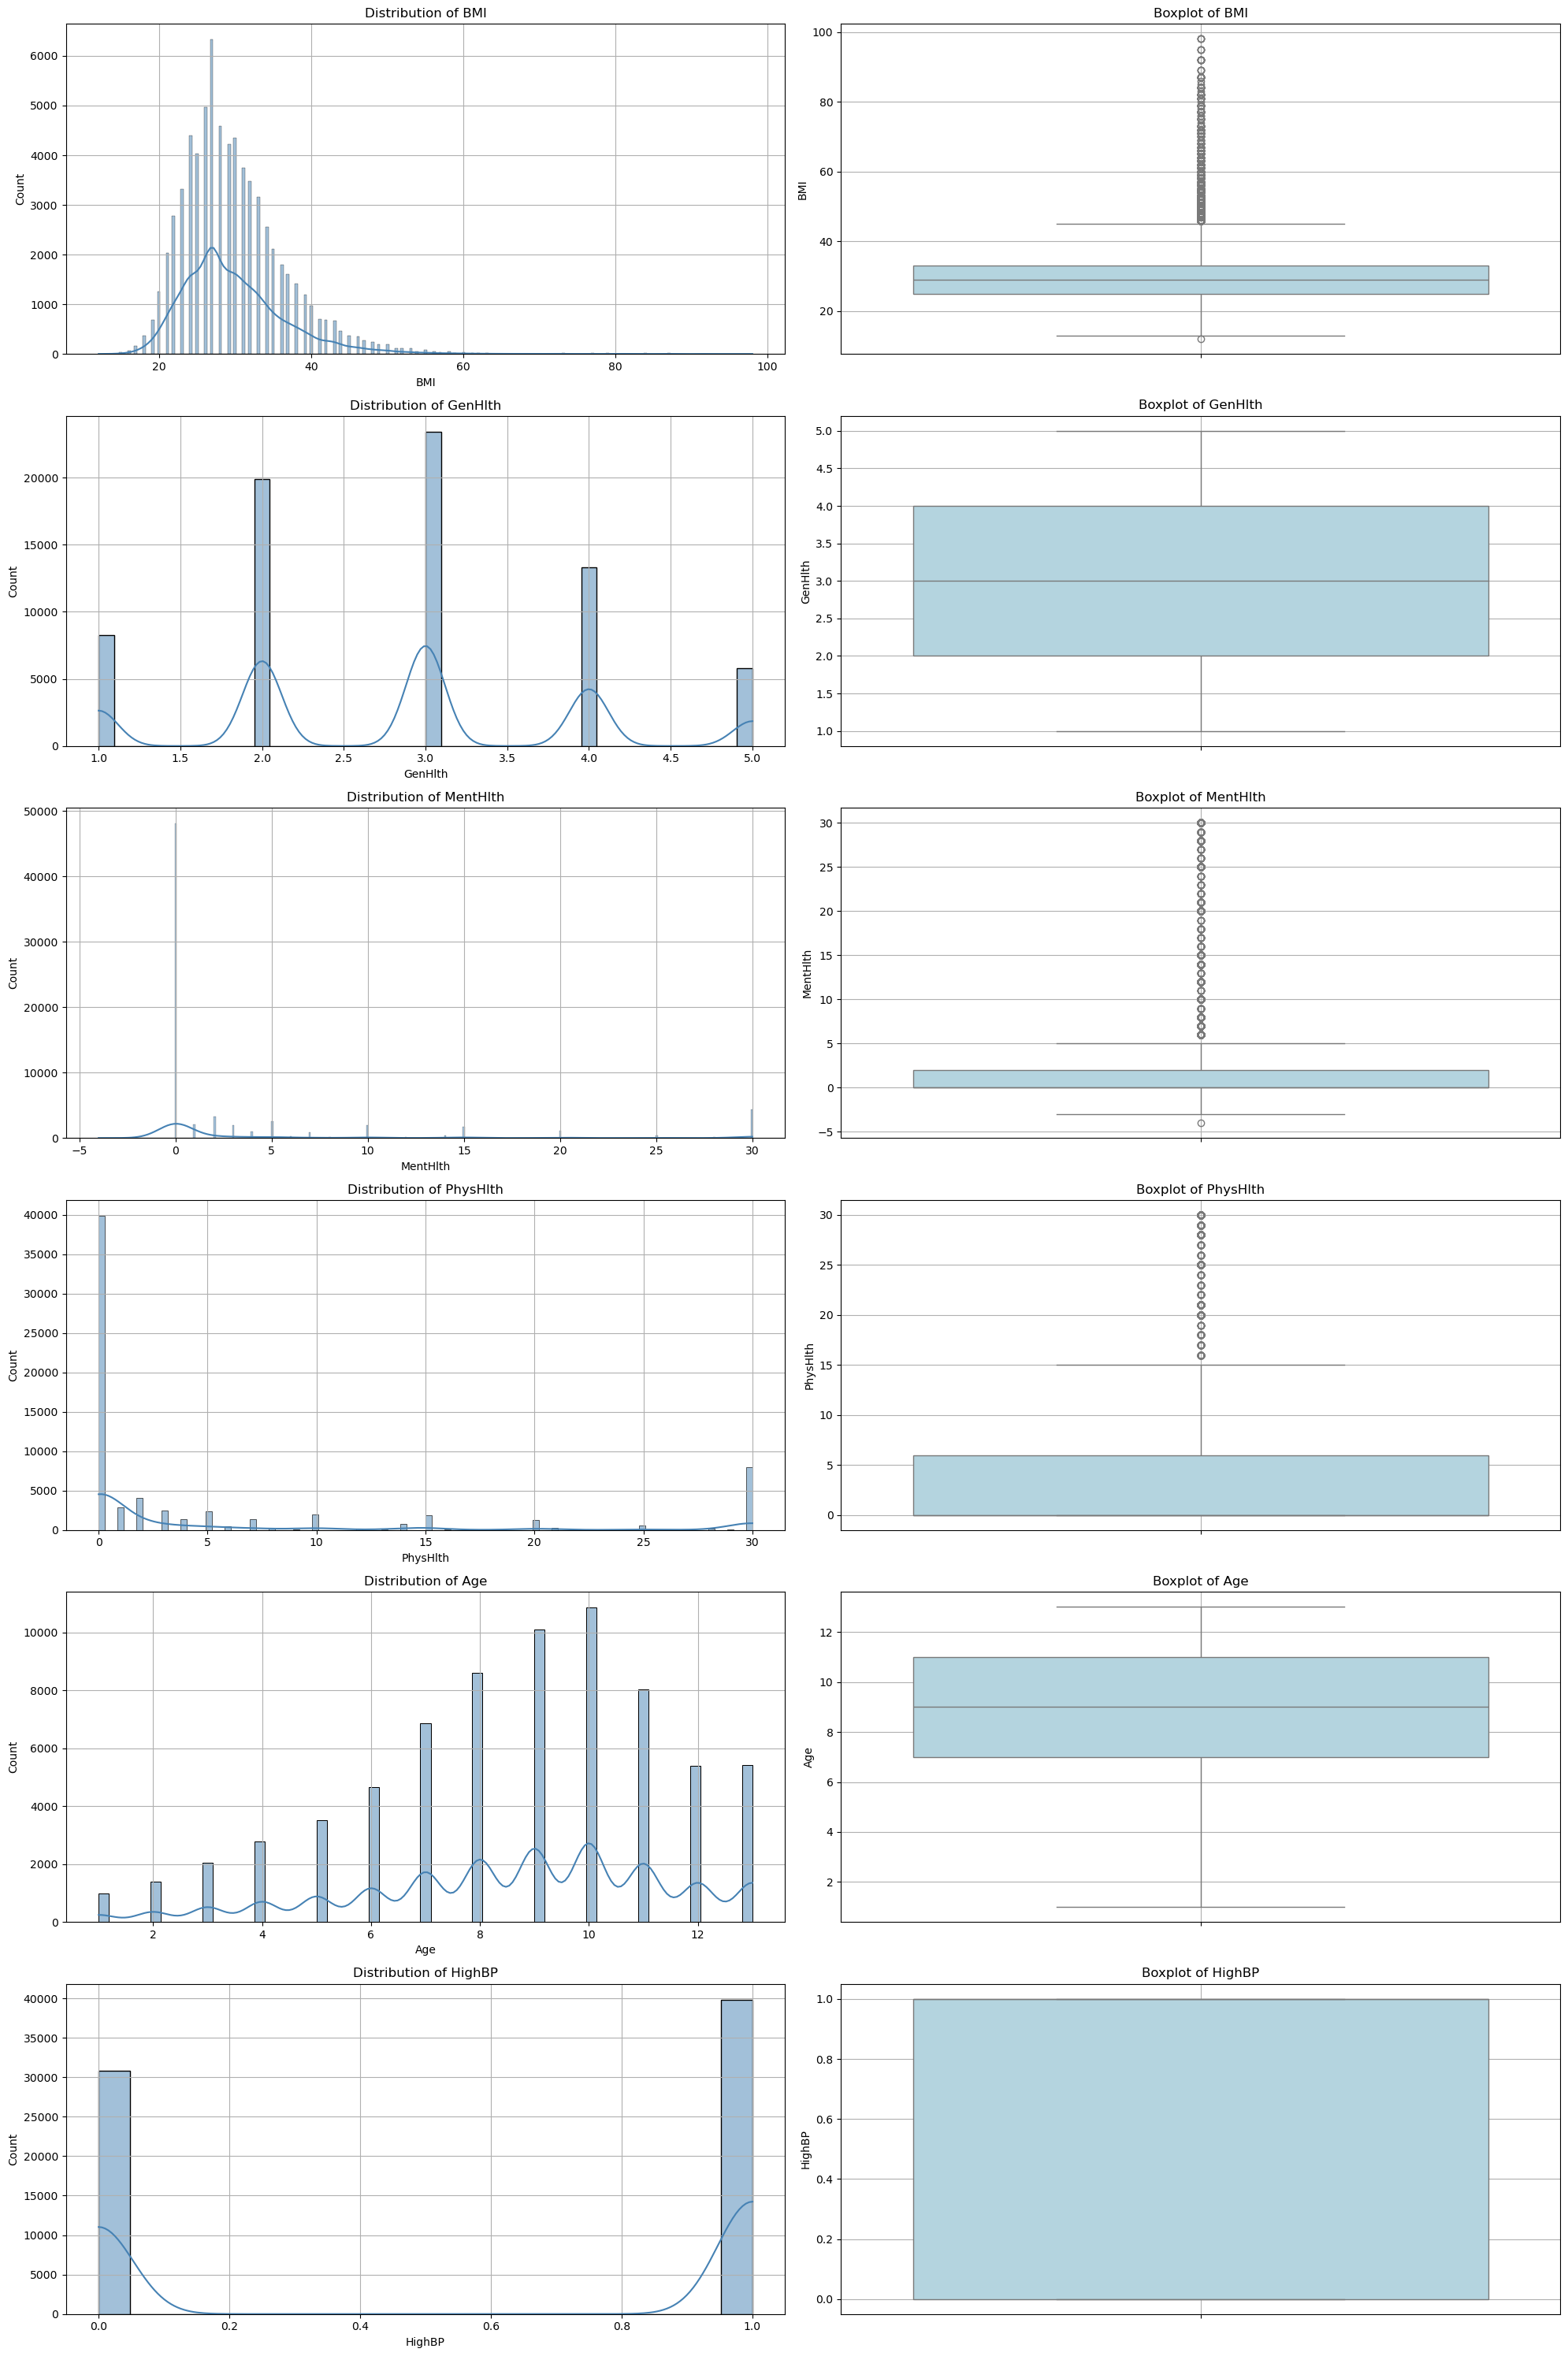

In [52]:

# Select features to visualize
features = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "HighBP"]

# Create subplots: one row per feature, two columns (distplot + boxplot)
f, axes = plt.subplots(len(features), 2, figsize=(20, 5 * len(features)))

for i, feature in enumerate(features):
    # Distribution plot
    sns.histplot(X[feature], kde=True, ax=axes[i][0], color='steelblue')
    axes[i][0].set_title(f"Distribution of {feature}")
    axes[i][0].grid()

    # Boxplot (no palette to avoid FutureWarning)
    sns.boxplot(y=X[feature], ax=axes[i][1], color='lightblue')
    axes[i][1].set_title(f"Boxplot of {feature}")
    axes[i][1].grid()

plt.tight_layout()
plt.show()

In [53]:
def handle_outliers_mad(df, column):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    threshold = 3 * mad
    df[column] = df[column].apply(lambda x: median if abs(x - median) > threshold else x)
    return df

# Apply to selected features
features_to_clean = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age", "HighBP"]

for feature in features_to_clean:
    X = handle_outliers_mad(X, feature)
    print(f"{feature} median after MAD treatment: {X[feature].median()}")

BMI median after MAD treatment: 29.0
GenHlth median after MAD treatment: 3.0
MentHlth median after MAD treatment: 0.0
PhysHlth median after MAD treatment: 0.0
Age median after MAD treatment: 9.0
HighBP median after MAD treatment: 1.0


📊 Distribution Comparison: Before vs After Outlier Handling

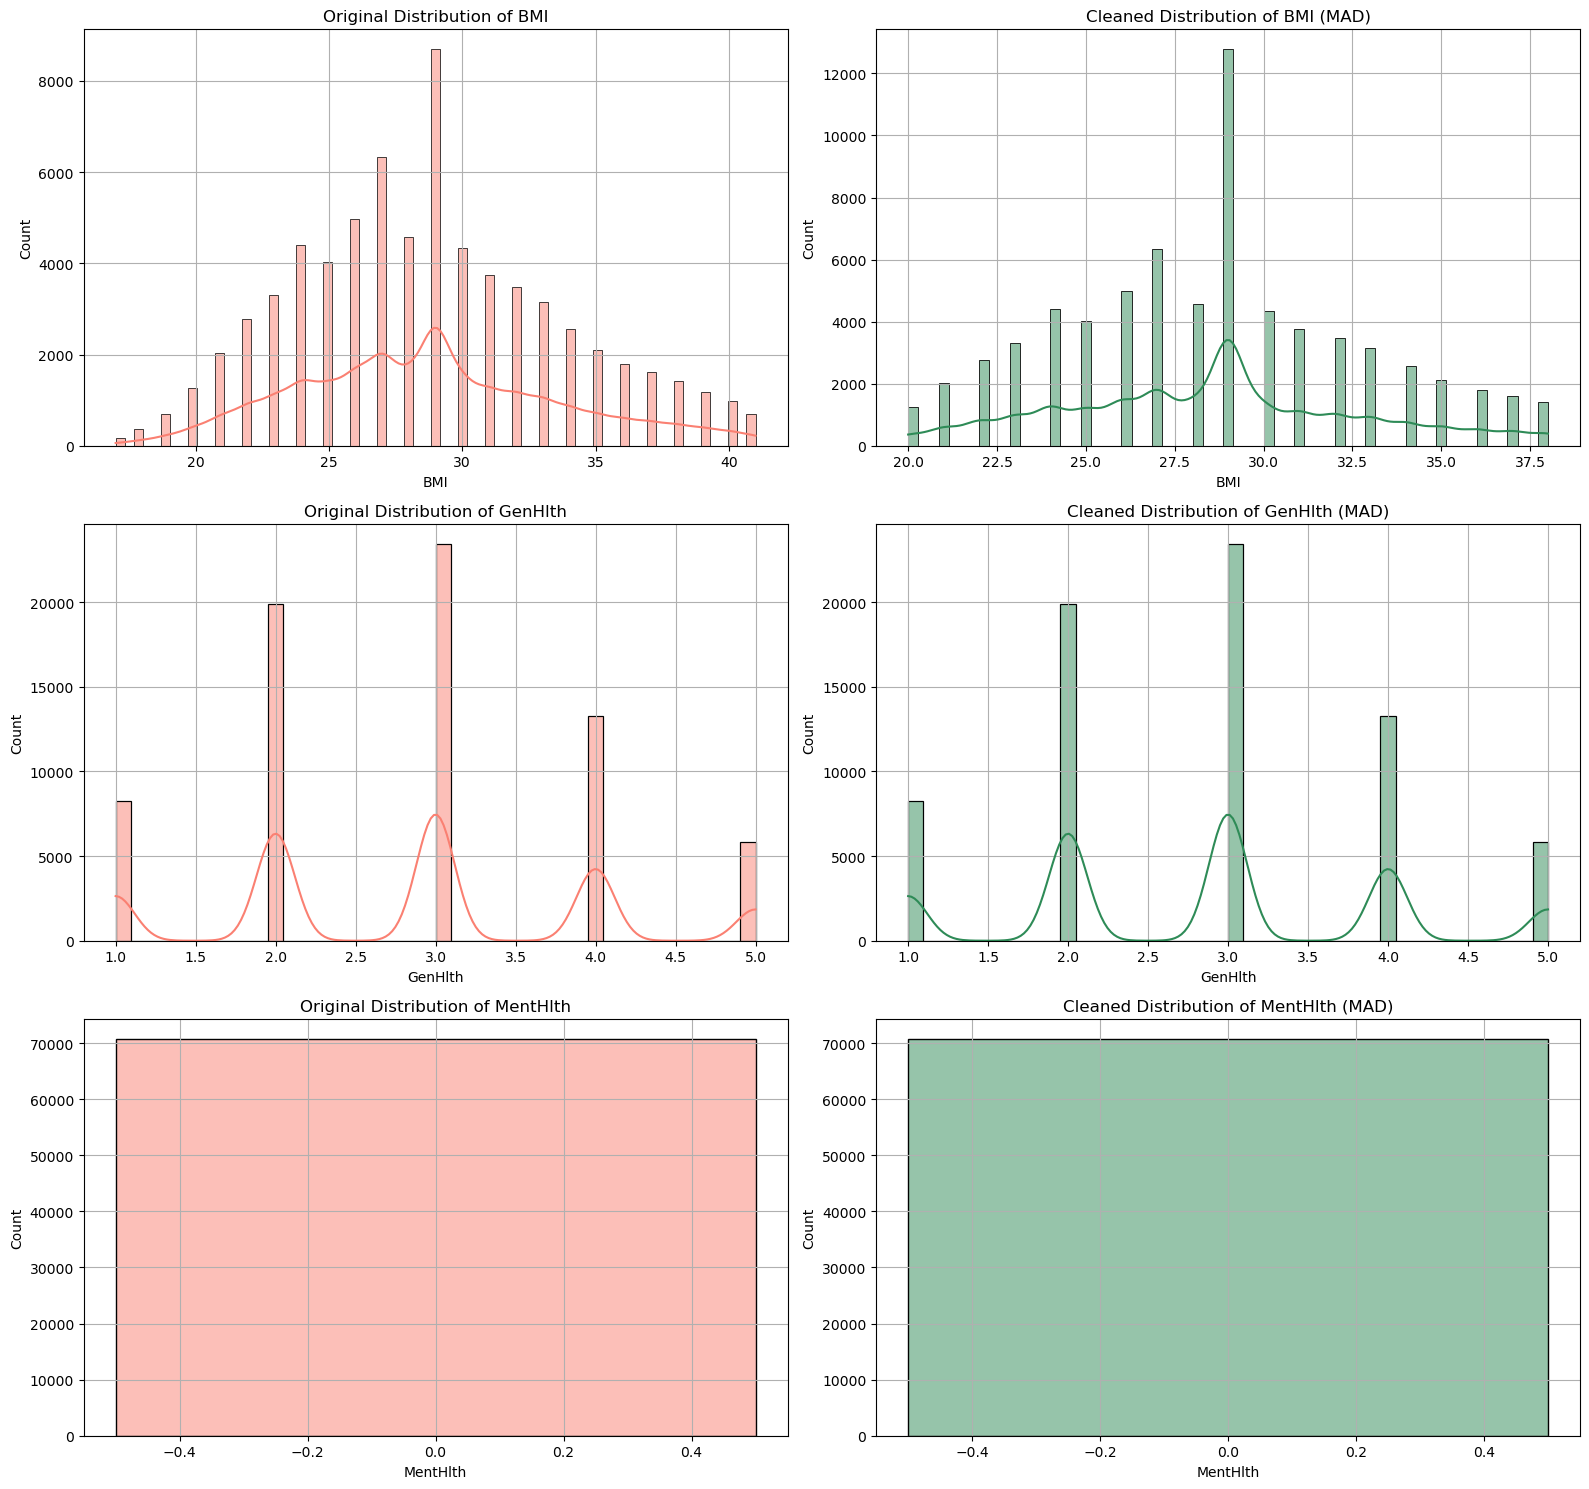

In [54]:

# Backup original data before outlier treatment
X_original = X.copy()

# Apply MAD-based outlier handling
def handle_outliers_mad(df, column):
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    threshold = 3 * mad
    df[column] = df[column].apply(lambda x: median if abs(x - median) > threshold else x)
    return df

features_to_compare = ["BMI", "GenHlth", "MentHlth"]

X_cleaned = X_original.copy()
for feature in features_to_compare:
    X_cleaned = handle_outliers_mad(X_cleaned, feature)

# Plot distributions before and after
fig, axes = plt.subplots(len(features_to_compare), 2, figsize=(16, 5 * len(features_to_compare)))

for i, feature in enumerate(features_to_compare):
    sns.histplot(X_original[feature], kde=True, ax=axes[i][0], color='salmon')
    axes[i][0].set_title(f"Original Distribution of {feature}")
    axes[i][0].grid()

    sns.histplot(X_cleaned[feature], kde=True, ax=axes[i][1], color='seagreen')
    axes[i][1].set_title(f"Cleaned Distribution of {feature} (MAD)")
    axes[i][1].grid()

plt.tight_layout()
plt.show()


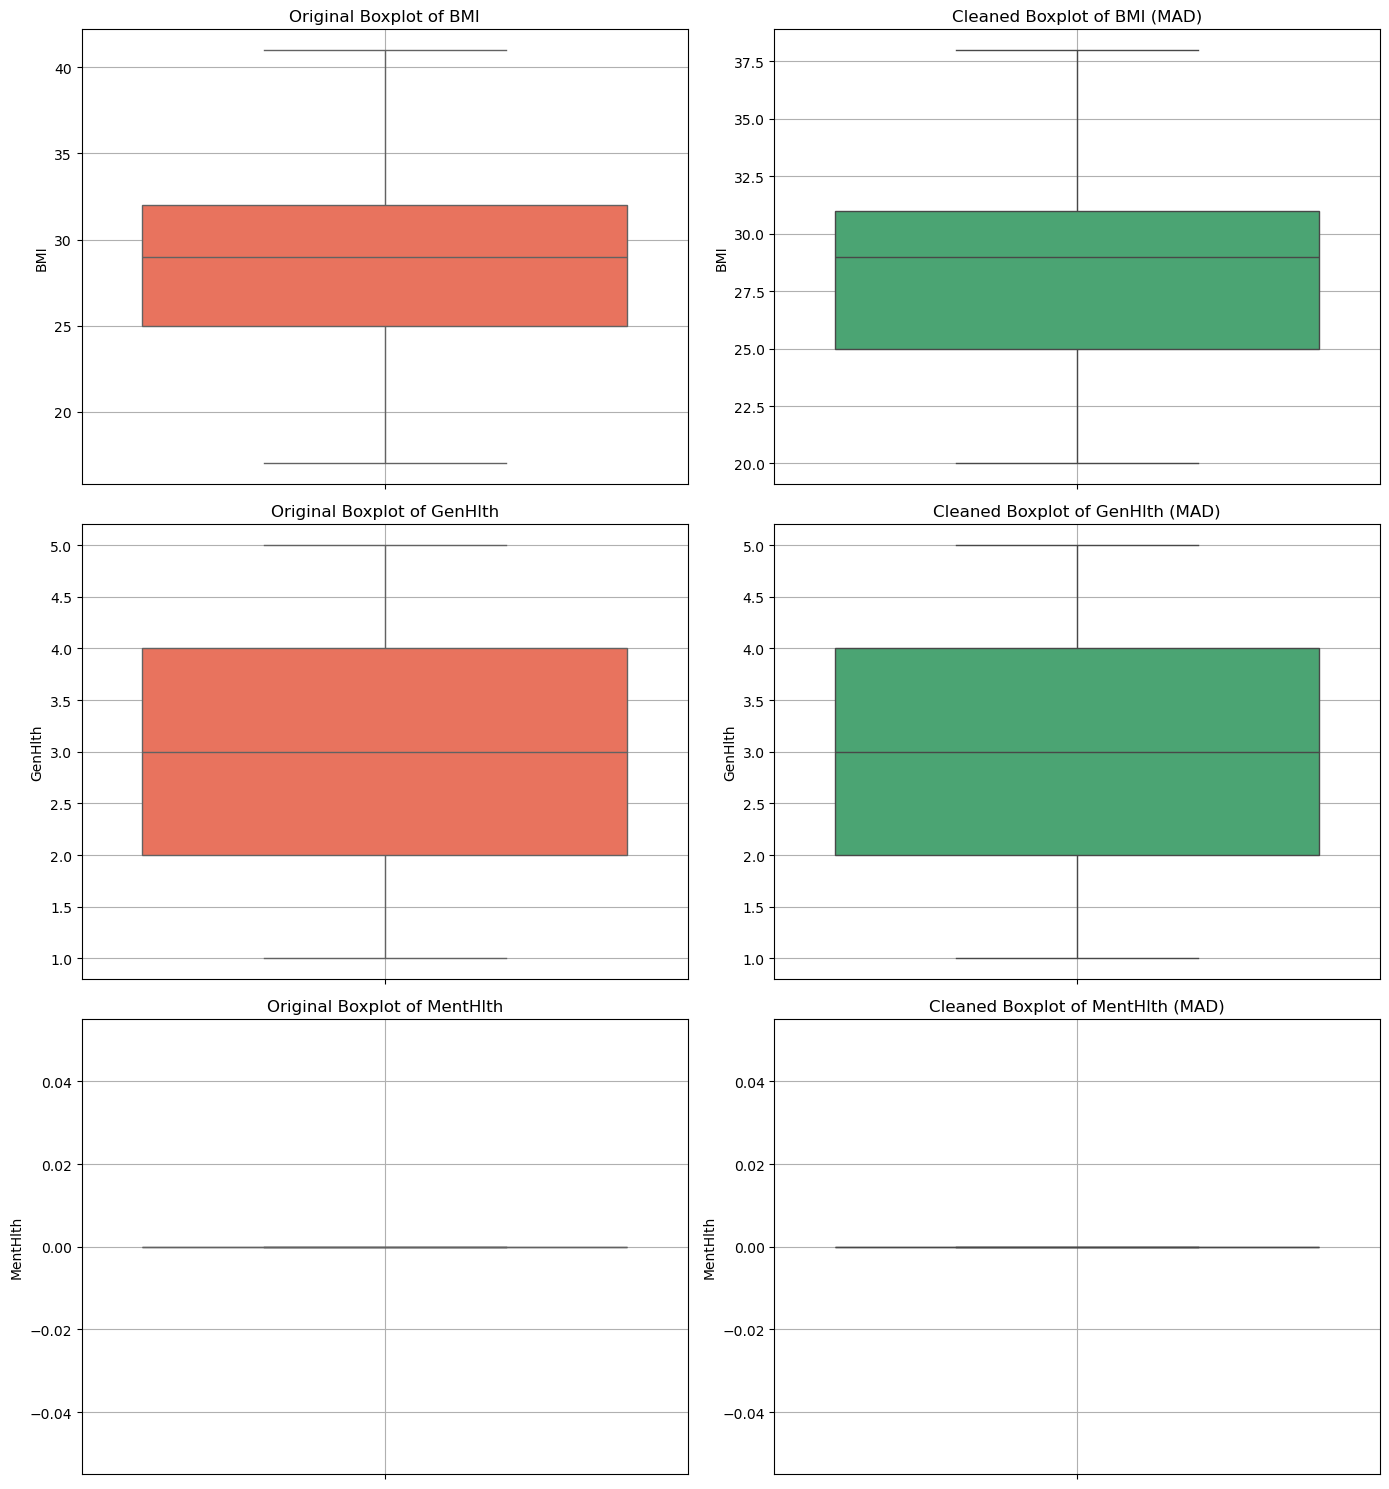

In [55]:

# Plot boxplots before and after
fig, axes = plt.subplots(len(features_to_compare), 2, figsize=(14, 5 * len(features_to_compare)))

for i, feature in enumerate(features_to_compare):
    sns.boxplot(y=X_original[feature], ax=axes[i][0], color='tomato')
    axes[i][0].set_title(f"Original Boxplot of {feature}")
    axes[i][0].grid()

    sns.boxplot(y=X_cleaned[feature], ax=axes[i][1], color='mediumseagreen')
    axes[i][1].set_title(f"Cleaned Boxplot of {feature} (MAD)")
    axes[i][1].grid()

plt.tight_layout()
plt.show()

Visualization of other Attributes with BMI & Diabetes

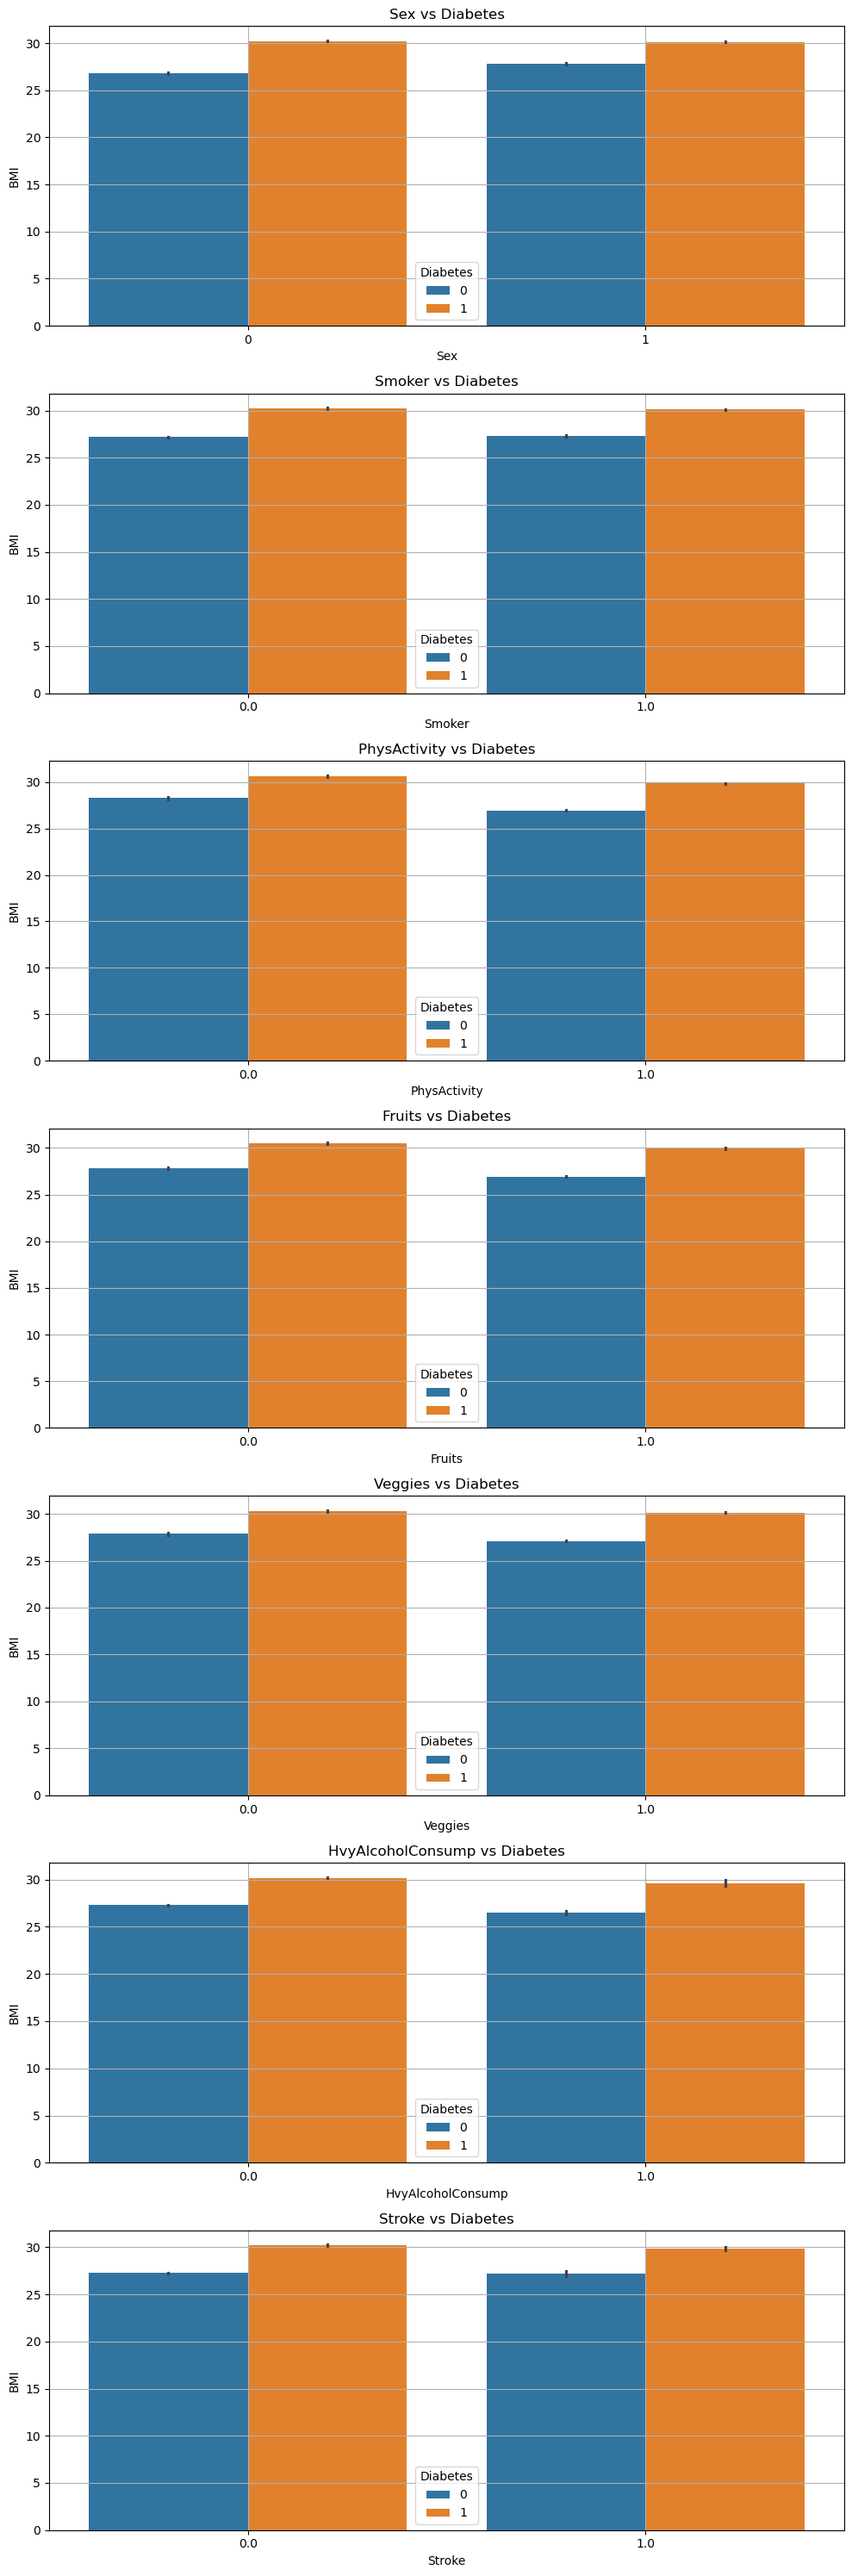

In [56]:

# Select categorical features to visualize against BMI
categorical_features = ["Sex", "Smoker", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "Stroke"]

# Create subplots
f, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 30))

for i, feature in enumerate(categorical_features):
    sns.barplot(x=X[feature], y=X["BMI"], hue=X["Diabetes"], ax=axes[i])
    axes[i].set_title(f"{feature} vs Diabetes")
    axes[i].grid()

plt.tight_layout()
plt.show()

#Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#Split the dataset
X["is_train"] = np.random.uniform(0, 1, len(X)) <= 0.75
train, test = X[X["is_train"] == True], X[X["is_train"] == False]
print("Training observations:", len(train))
print("Testing observations:", len(test))

Training observations: 52922
Testing observations: 17770


In [60]:

# Select features and target
features = X.columns.drop(["Diabetes" ,"Fruits_missing","HvyAlcohol_missing", "is_train"])
target = "Diabetes"

In [61]:
 # Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=1)
clf.fit(train[features], train[target])
preds = clf.predict(test[features])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [62]:
# Evaluate accuracy
conf_matrix = pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predicted"])
print(conf_matrix)
print("Accuracy:", clf.score(test[features], test[target]))


Predicted     0     1
Actual               
0          6005  2871
1          2585  6309
Accuracy: 0.6929656724817107


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [63]:
# Feature Importance
importance_scores = list(zip(features, clf.feature_importances_))
importance_df = pd.DataFrame(importance_scores, columns=["Feature", "Importance"]).sort_values(by="Importance", ascending=False)
print(importance_df)

                 Feature  Importance
4                    BMI    0.300003
0                    Age    0.194950
11               GenHlth    0.167295
2               HighChol    0.064589
14              DiffWalk    0.038976
8                 Fruits    0.037048
5                 Smoker    0.035746
1                    Sex    0.034303
9                Veggies    0.031198
7           PhysActivity    0.030200
6   HeartDiseaseorAttack    0.027132
15                Stroke    0.015699
10     HvyAlcoholConsump    0.012663
3              CholCheck    0.010199
12              MentHlth    0.000000
13              PhysHlth    0.000000
16                HighBP    0.000000


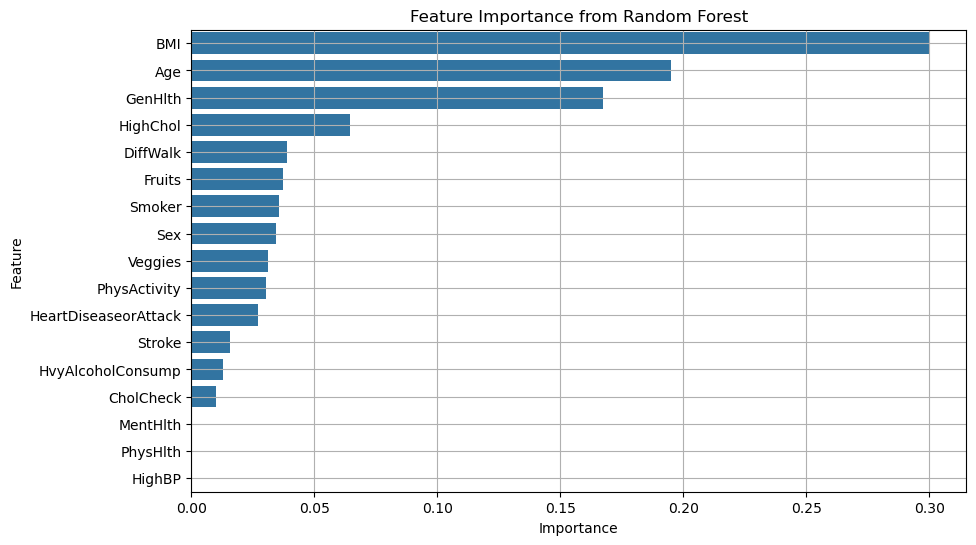

In [64]:
# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("Feature Importance from Random Forest")
plt.grid()
plt.show()

In [75]:
# Save refined dataset with top features
top_features = importance_df["Feature"].head(10).tolist()
final_dataset = X[top_features + [target]].copy()
final_dataset.to_csv("final_diabetes_train.csv", index=False)

In [76]:
final_dataset.describe(include="all")  

,BMI,Age,GenHlth,HighChol,DiffWalk,Fruits,Smoker,Sex,Veggies,PhysActivity,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,28.708963,8.833079,2.837068,0.525703,0.252730,0.613153,0.475259,0.456997,0.788788,0.703036,0.500000
std,4.977768,2.534944,1.113556,0.499342,0.434581,0.487032,0.499391,0.498151,0.408171,0.456924,0.500004
min,17.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,29.000000,9.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.500000
75%,32.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 🧠 Training Our Required Models
Our project goal requires us to train four classifier models:

**KNN Classifier**

**Naive Bayes Classifier**

**Decision Tree Classifier**

**Logistic Regression Classifier**

We will use the dataset obtained after pre-processing the original diabetes training data to train these models.

# 📦 Importing Required Modules

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    roc_curve, roc_auc_score, auc,
    mean_squared_error, accuracy_score,
    classification_report
)


In [80]:
final_dataset["is_train"] = np.random.uniform(0, 1, len(final_dataset)) <= 0.75
train = final_dataset[final_dataset["is_train"] == True]
test = final_dataset[final_dataset["is_train"] == False]

print("No. of observations for the training dataframe:", len(train))
print("No. of observations for the test dataframe:", len(test))
print(final_dataset.columns[:])


No. of observations for the training dataframe: 53189
No. of observations for the test dataframe: 17503
Index(['BMI', 'Age', 'GenHlth', 'HighChol', 'DiffWalk', 'Fruits', 'Smoker',
       'Sex', 'Veggies', 'PhysActivity', 'Diabetes', 'is_train'],
      dtype='object')


# 🧪 KNN Classifier for Diabetes Dataset 

In [95]:
# 📦 Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ✅ Feature Selection
features = ['BMI', 'Age', 'GenHlth', 'HighChol', 'DiffWalk', 'Fruits', 'Smoker', 'Sex', 'Veggies', 'PhysActivity']
X = final_dataset[features]
y = final_dataset['Diabetes']  

# ⚙️ Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 🧱 Pipeline Setup
pipe = Pipeline([
    ('knn', KNeighborsClassifier())
])

# 🔍 Search Space
search_space = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform'],
    'knn__metric': ['euclidean']
}

# 🚀 Grid Search
grid = GridSearchCV(pipe, search_space, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# 📊 Evaluation
print("✅ Best Parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print("📈 Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
📈 Accuracy: 0.7074633621909127
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70      8830
           1       0.69      0.74      0.72      8843

    accuracy                           0.71     17673
   macro avg       0.71      0.71      0.71     17673
weighted avg       0.71      0.71      0.71     17673



🧮 Confusion Matrix:
                     Predicted: No Diabetes  Predicted: Diabetes
Actual: No Diabetes                    5925                 2905
Actual: Diabetes                       2265                 6578


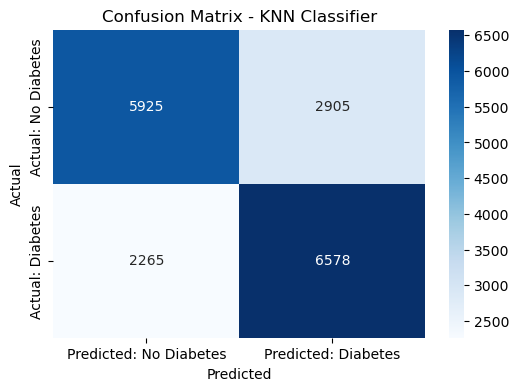

In [98]:
from sklearn.metrics import confusion_matrix

# 🔍 Raw confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 🧾 Display as labeled table
conf_matrix_df = pd.DataFrame(
    cm,
    index=["Actual: No Diabetes", "Actual: Diabetes"],
    columns=["Predicted: No Diabetes", "Predicted: Diabetes"]
)

print("🧮 Confusion Matrix:")
print(conf_matrix_df)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

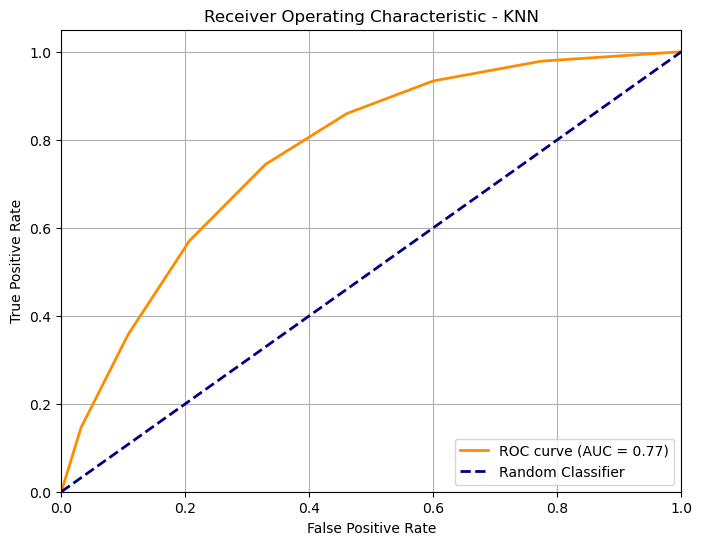

In [102]:
# ROC Curve for KNN Classifier
# 🔮 Get predicted probabilities for the positive class
y_pred_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

# 📈 Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# 🎨 Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [103]:
# Use best KNN model from GridSearchCV
KNNModel = grid.best_estimator_

# 📊 Cross-Validate Using Recall
recall_scores = cross_val_score(KNNModel, X_scaled, y, cv=5, scoring="recall")
print("🔁 Recall CV Scores:", recall_scores)
print("📈 Mean Recall:", round(recall_scores.mean(), 4))

# 📊 Cross-Validate Using Precision
precision_scores = cross_val_score(KNNModel, X_scaled, y, cv=5, scoring="precision")
print("🔁 Precision CV Scores:", precision_scores)
print("📈 Mean Precision:", round(precision_scores.mean(), 4))

🔁 Recall CV Scores: [0.68340642 0.68514851 0.69826001 0.70519168 0.70193804]
📈 Mean Recall: 0.6948
🔁 Precision CV Scores: [0.7016703  0.70581378 0.71494786 0.71479782 0.71426515]
📈 Mean Precision: 0.7103


In [104]:
# 📋 Final Evaluation on Test Set
y_pred_knn = KNNModel.predict(X_test)
print("✅ Accuracy of KNN classifier:", round(accuracy_score(y_test, y_pred_knn), 4))
print("📋 Classification Report:\n", classification_report(y_test, y_pred_knn))

✅ Accuracy of KNN classifier: 0.7075
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.67      0.70      8830
           1       0.69      0.74      0.72      8843

    accuracy                           0.71     17673
   macro avg       0.71      0.71      0.71     17673
weighted avg       0.71      0.71      0.71     17673

